In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

 1. Understanding the Data

1.1 Loading available datasets

In [2]:
pd.set_option('display.max_columns', None)
listing = pd.read_csv("listings.csv")
print(f"Size of listing dataset: {listing.shape}")
listing.head(3)

Size of listing dataset: (87947, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13913,Rental unit in Islington · ★4.80 · 1 bedroom ·...,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,79,1,41,2022-12-11,0.26,2,360,11,NaN
1,15400,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,7,94,2023-05-01,0.56,1,73,5,NaN
2,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,498201,Dee Dee,NaN,Wandsworth,51.44201,-0.18739,Private room,42,2,216,2022-10-29,1.45,1,217,9,NaN


In [3]:
listing_all = pd.read_csv("listings2.csv")
print(f"Size of listing detailed dataset: {listing_all.shape}")
listing_all.head(3)

Size of listing detailed dataset: (87946, 75)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,https://www.airbnb.com/users/show/498201,Dee Dee,2011-04-10,"London, United Kingdom",I am employed at St Georges hospital in tootin...,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/0edcb...,https://a0.muscache.com/im/pictures/user/0edcb...,Earlsfield,1.0,1.0,"['email', 'phone']",t,t,NaN,Wandsworth,NaN,51.44201,-0.18739,Private room in rental unit,Private room,2,NaN,1.5 shared baths,NaN,2.0,"[""Heating"", ""TV with standard cable"", ""Wifi"", ...",$42.00,2,730,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,0,0,0,217,2023-09-06,216,9,0,2011-06-21,2022-10-29,4.57,4.74,4.86,4.71,4.67,4.53,4.68,NaN,t,1,0,1,0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,https://www.airbnb.com/users/show/499704,Sarah,2011-04-11,"London, United Kingdom",Been living in London for over 20 years and I ...,within a few hours,100%,25%,f,https://a0.muscache.com/im/pictures/user/452ff...,https://a0.muscache.com/im/pictures/user/452ff...,Hammersmith,1.0,2.0,"['email', 'phone']",t,t,"Hammersmith, England, United Kingdom",Hammersmith and Fulham,NaN,51.49993,-0.21707,Entire rental unit,Entire home/apt,5,NaN,1 bath,2.0,3.0,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",$175.00,5,240,5.0,5.0,240.0,240.0,5.0,240.0,NaN,t,13,18,38,40,2023-09-06,38,2,0,2012-02-01,2022-09-30,4.82,4.76,4.62,4.85,4.88,4.85,4.74,NaN,f,1,1,0,0,0.27
2,13913,https://www.airbnb.com/rooms/13913,20230906022807,2023-09-06,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,100%,88%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,4.0,"['email', 'phone']",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.56861,-0.11270,Private room in rental unit,Private room,1,NaN,1 shared bath,NaN,1.0,"[""Bathtub"", ""Hot water kettle"", ""Laundromat ne...",$79.00,1,29,1.0,1.0,29.0,29.0,1.0,29.0,NaN,t,25,55,85,360,2023-09-

In [4]:
print(f"{listing.columns}")
print(f"{listing_all.columns}")

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', '

In [5]:
listing.neighbourhood.value_counts(dropna=False)

neighbourhood
Westminster               9992
Tower Hamlets             7080
Hackney                   6182
Kensington and Chelsea    5818
Camden                    5757
Southwark                 5015
Lambeth                   4774
Islington                 4675
Wandsworth                4419
Hammersmith and Fulham    3795
Brent                     2740
Lewisham                  2581
Haringey                  2382
Newham                    2311
Barnet                    2249
Ealing                    2169
Greenwich                 1927
Waltham Forest            1715
Croydon                   1506
Merton                    1453
Richmond upon Thames      1257
Hounslow                  1253
Redbridge                  869
Hillingdon                 863
Enfield                    820
Bromley                    772
Kingston upon Thames       700
Barking and Dagenham       564
City of London             536
Harrow                     503
Bexley                     495
Havering                 

In [6]:
review = pd.read_csv("reviews.csv")
print(f"Size of review dataset: {review.shape}")
review.head(3)

Size of review dataset: (1581033, 2)


,listing_id,date
0,13913,2010-08-18
1,13913,2011-07-11
2,13913,2011-09-13


In [7]:
review_all = pd.read_csv("reviews2.csv")
print(f"Size of review detailed dataset: {review_all.shape}")
review_all.head(3)

Size of review detailed dataset: (1581033, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...


In [8]:
calendar = pd.read_csv("calendar.csv")
print(f"Size of calendar dataset: {calendar.shape}")
calendar.head(3)

Size of calendar dataset: (32100363, 7)


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,13913,2023-09-06,f,$79.00,$79.00,1.0,29.0
1,13913,2023-09-07,f,$79.00,$79.00,1.0,29.0
2,13913,2023-09-08,f,$79.00,$79.00,1.0,29.0


In [9]:
ngb = pd.read_csv("neighbourhoods.csv")
print(f"Size of neighbourhoods dataset: {ngb.shape}")
ngb.head(3)

Size of neighbourhoods dataset: (33, 2)


,neighbourhood_group,neighbourhood
0,NaN,Barking and Dagenham
1,NaN,Barnet
2,NaN,Bexley


In [10]:
ngb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        33 non-null     object 
dtypes: float64(1), object(1)
memory usage: 656.0+ bytes


          neighbourhood neighbourhood_group  \
0  Kingston upon Thames                None   
1               Croydon                None   
2               Bromley                None   
3              Hounslow                None   
4                Ealing                None   

                                            geometry  
0  MULTIPOLYGON (((-0.33066 51.32901, -0.33057 51...  
1  MULTIPOLYGON (((-0.06399 51.31864, -0.06405 51...  
2  MULTIPOLYGON (((0.01216 51.29960, 0.01199 51.2...  
3  MULTIPOLYGON (((-0.24454 51.48870, -0.24466 51...  
4  MULTIPOLYGON (((-0.41181 51.53408, -0.41186 51...  


<Axes: >

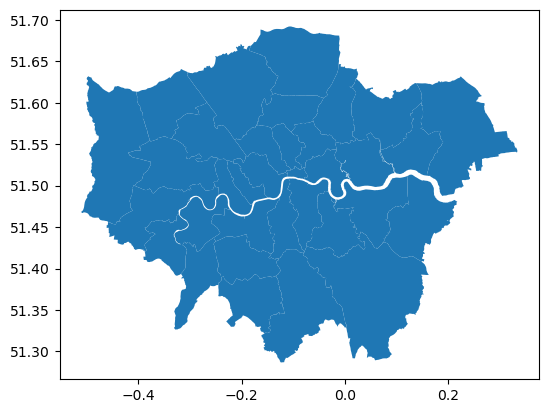

In [11]:
gdf = gpd.read_file("neighbourhoods.geojson")
print(gdf.head())
gdf.plot()

1.2 Trimming main listing dataset in order to get only the most important features that can give us insights about the data

In [12]:
listing = listing_all[['id', 'name', 'host_id', 'host_name',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'first_review', 'last_review',
       'reviews_per_month', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'host_response_time', 'host_is_superhost']]
listing.head()

,id,name,host_id,host_name,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,first_review,last_review,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,host_response_time,host_is_superhost
0,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,498201,Dee Dee,NaN,Wandsworth,51.44201,-0.18739,Private room,$42.00,2,216,2011-06-21,2022-10-29,1.45,4.57,4.74,4.86,4.71,4.67,4.53,4.68,1,217,9,NaN,NaN,f
1,93015,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,499704,Sarah,"Hammersmith, England, United Kingdom",Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,$175.00,5,38,2012-02-01,2022-09-30,0.27,4.82,4.76,4.62,4.85,4.88,4.85,4.74,1,40,2,NaN,within a few hours,f
2,13913,Rental unit in Islington · ★4.80 · 1 bedroom ·...,54730,Alina,"Islington, Greater London, United Kingdom",Islington,51.56861,-0.11270,Private room,$79.00,1,41,2010-08-18,2022-12-11,0.26,4.80,4.72,4.72,4.74,4.82,4.69,4.69,2,360,11,NaN,within a few hours,f
3,15400,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,60302,Philippa,"London, United Kingdom",Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,$150.00,7,94,2009-12-21,2023-05-01,0.56,4.80,4.85,4.88,4.88,4.83,4.93,4.74,1,73,5,NaN,within a day,f
4,93734,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,497514,William,NaN,Greenwich,51.47618,0.01442,Private room,$46.00,4,180,2011-06-30,2023-09-02,1.21,4.62,4.70,4.59,4.63,4.81,4.64,4.67,1,196,25,NaN,within a few hours,t


1.3 First insights about neighbourhoods

In [13]:
listing.describe()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8.794600e+04,8.794600e+04,87946.000000,87946.000000,87946.000000,87946.000000,65788.000000,65788.000000,64853.000000,64865.000000,64821.000000,64851.000000,64821.000000,64820.000000,87946.000000,87946.000000,87946.000000
mean,3.586523e+17,1.589904e+08,51.509557,-0.127900,5.618050,17.977236,1.014903,4.596540,4.712780,4.623333,4.777310,4.798890,4.720487,4.593404,18.140950,121.112808,5.797194
std,4.121119e+17,1.694033e+08,0.048749,0.099645,23.571976,42.834975,1.365452,0.750778,0.500756,0.551075,0.457757,0.451838,0.421893,0.536391,63.745275,134.554102,12.748319
min,1.391300e+04,4.775000e+03,51.295937,-0.497800,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.215818e+07,2.186737e+07,51.483371,-0.189174,1.000000,0.000000,0.150000,4.500000,4.650000,4.500000,4.750000,4.790000,4.630000,4.490000,1.000000,0.000000,0.000000
50%,4.935854e+07,8.140696e+07,51.513780,-0.126400,2.000000,4.000000,0.540000,4.820000,4.880000,4.800000,4.940000,4.970000,4.840000,4.740000,2.000000,65.000000,1.000000
75%,8.164776e+17,2.668211e+08,51.539420,-0.068066,4.000000,16.000000,1.320000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.960000,6.000000,249.000000,6.000000
max,9.738958e+17,5.355140e+08,51.681642,0.295731,1125.000000,1536.000000,50.250000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,595.000000,365.000000,594.000000


In [14]:
listing['price'] = listing['price'].str.replace('$', '')
listing['price'] = listing['price'].str.replace(',', '')
listing['price'] = listing['price'].astype(float)
listing.head()

,id,name,host_id,host_name,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,first_review,last_review,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,host_response_time,host_is_superhost
0,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,498201,Dee Dee,NaN,Wandsworth,51.44201,-0.18739,Private room,42.0,2,216,2011-06-21,2022-10-29,1.45,4.57,4.74,4.86,4.71,4.67,4.53,4.68,1,217,9,NaN,NaN,f
1,93015,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,499704,Sarah,"Hammersmith, England, United Kingdom",Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175.0,5,38,2012-02-01,2022-09-30,0.27,4.82,4.76,4.62,4.85,4.88,4.85,4.74,1,40,2,NaN,within a few hours,f
2,13913,Rental unit in Islington · ★4.80 · 1 bedroom ·...,54730,Alina,"Islington, Greater London, United Kingdom",Islington,51.56861,-0.11270,Private room,79.0,1,41,2010-08-18,2022-12-11,0.26,4.80,4.72,4.72,4.74,4.82,4.69,4.69,2,360,11,NaN,within a few hours,f
3,15400,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,60302,Philippa,"London, United Kingdom",Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150.0,7,94,2009-12-21,2023-05-01,0.56,4.80,4.85,4.88,4.88,4.83,4.93,4.74,1,73,5,NaN,within a day,f
4,93734,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,497514,William,NaN,Greenwich,51.47618,0.01442,Private room,46.0,4,180,2011-06-30,2023-09-02,1.21,4.62,4.70,4.59,4.63,4.81,4.64,4.67,1,196,25,NaN,within a few hours,t


In [15]:
ngb_insight = listing.groupby('neighbourhood_cleansed').agg({'id':'count', 'price':'mean', 'reviews_per_month': 'mean',
                                             'review_scores_rating': 'mean', 'review_scores_accuracy': 'mean',
                                              'review_scores_cleanliness': 'mean','review_scores_checkin': 'mean',
                                              'review_scores_communication': 'mean', 'review_scores_location': 'mean',
                                              'review_scores_value': 'mean'}).reset_index()
ngb_insight

,neighbourhood_cleansed,id,price,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,Barking and Dagenham,564,245.840426,0.937929,4.551263,4.674562,4.625000,4.724691,4.786495,4.529227,4.591701
1,Barnet,2249,160.523344,0.956372,4.602639,4.692953,4.632948,4.783568,4.792304,4.653934,4.597515
2,Bexley,495,95.046465,1.021686,4.609408,4.682000,4.622537,4.755642,4.778866,4.582209,4.589522
3,Brent,2740,179.079197,1.015458,4.580713,4.702382,4.614859,4.777544,4.795609,4.595226,4.572548
4,Bromley,772,105.972798,0.907686,4.685929,4.722632,4.675891,4.804822,4.824160,4.686486,4.648710
5,Camden,5757,203.288171,1.212784,4.539880,4.660692,4.575392,4.742236,4.756485,4.793553,4.507987
6,City of London,536,243.722015,1.509806,4.510752,4.627083,4.582396,4.686814,4.696471,4.811838,4.463260
7,Croydon,1506,91.065737,1.010850,4.571561,4.668742,4.608070,4.758108,4.756348,4.539792,4.578628
8,Ealing,2169,125.220839,0.972872,4.607964,4.700946,4.637117,4.781651,4.781549,4.624406,4.589695
9,Enfield,820,107.159756,0.925361,4.605825,4.682835,4.631983,4.749268,4.783791,4.591670,4.612957


## Q1. Top 5 neighbourhoods based on review scores?


A. Based on the bar chart plotted below, the top 5 best reviewed neighbourhoods are Kingston upon Thames, Richmond upon Thames, Bromley, Waltham Fores and Hackney, respectively.

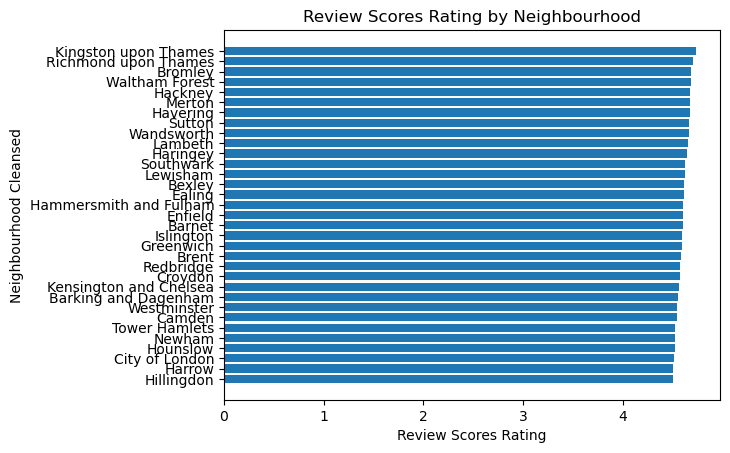

In [16]:
df = ngb_insight.sort_values(by='review_scores_rating', ascending=True)

plt.barh(df['neighbourhood_cleansed'], df['review_scores_rating'])

plt.xlabel('Review Scores Rating')
plt.ylabel('Neighbourhood Cleansed')
plt.title('Review Scores Rating by Neighbourhood')

plt.show()

In [17]:
gdf = gdf.merge(ngb_insight, left_on='neighbourhood', right_on='neighbourhood_cleansed', how='left')

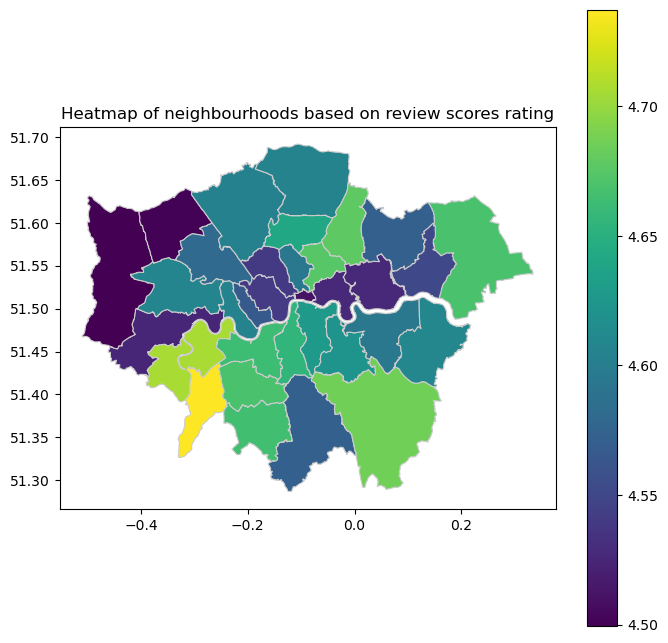

In [18]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

gdf.plot(column='review_scores_rating', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Heatmap of neighbourhoods based on review scores rating')

plt.show()

## Q2. What is the area of the city with better review scores?

A. As shown in the heatmap above, Southwest of London concentrates neighbourhoods with overall highest review scores. Such area is home to well reviewed neighbourhoods such as Kingston upon Thames and Richmond upon Thames.

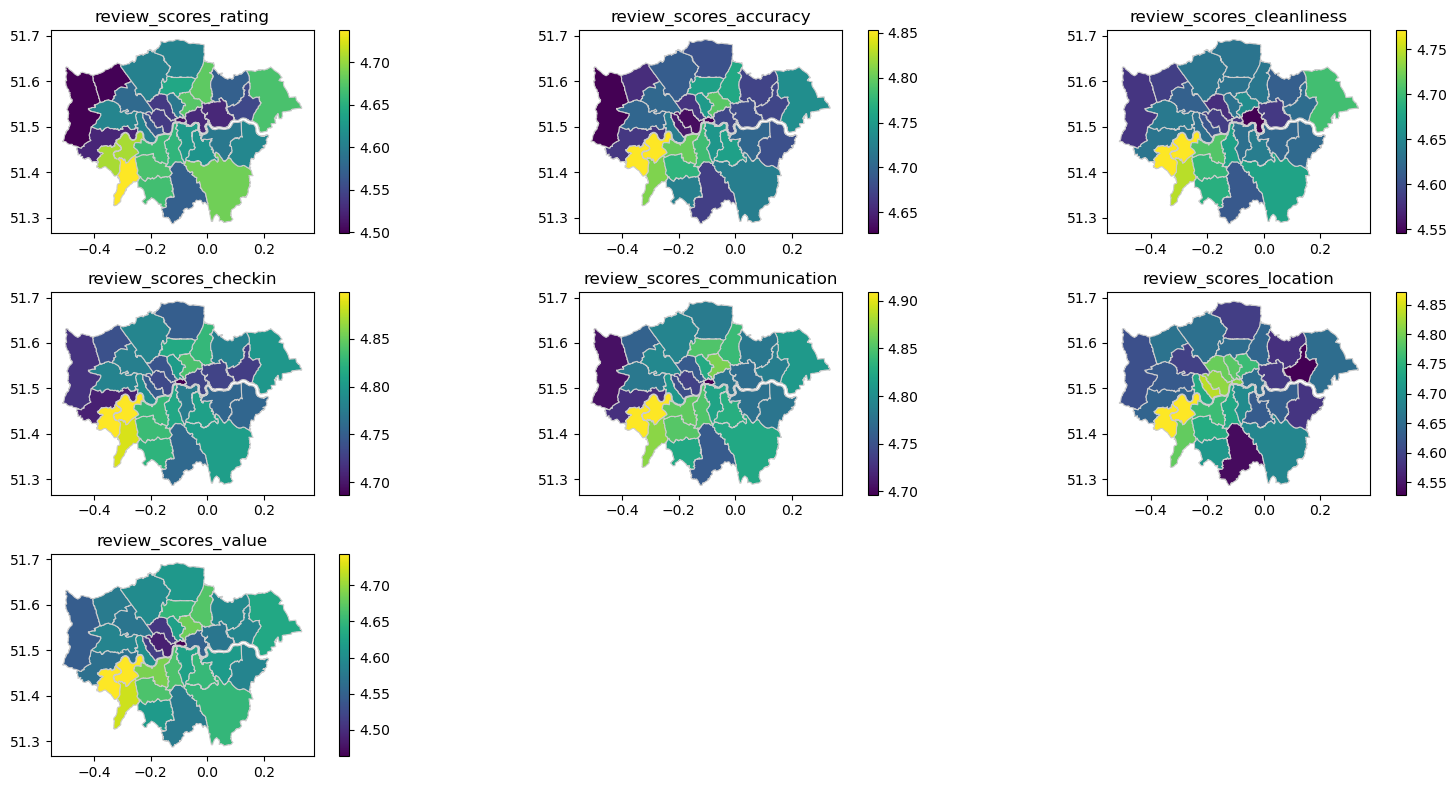

In [19]:
# List of columns for which to create heatmaps
columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
           'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
           'review_scores_value']

nrows = 3
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 8))

axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]
    gdf.plot(column=column, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(column)

for i in range(len(columns), nrows * ncols):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

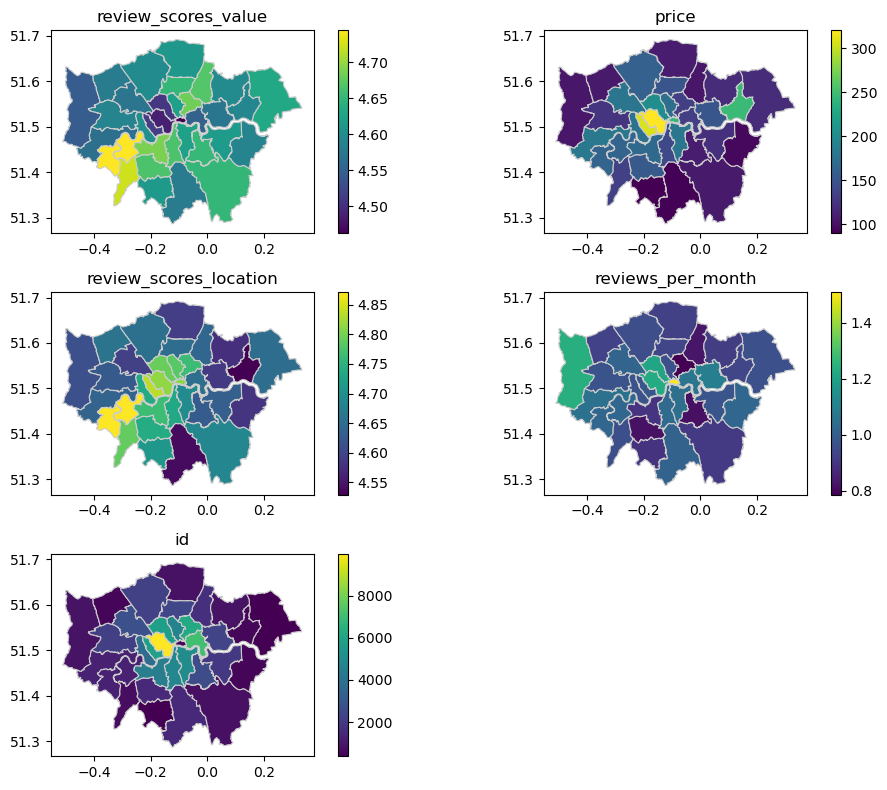

In [20]:
# List of columns for which to create heatmaps
columns = ['review_scores_value', 'price', 'review_scores_location', 'reviews_per_month', 'id']

nrows = 3
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]
    gdf.plot(column=column, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(column)

for i in range(len(columns), nrows * ncols):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

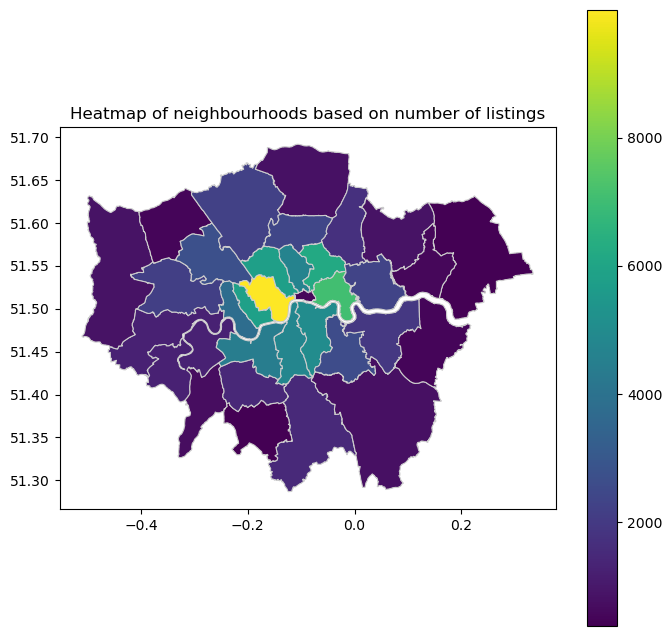

In [21]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

gdf.plot(column='id', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Heatmap of neighbourhoods based on number of listings')

# Show the plot
plt.show()

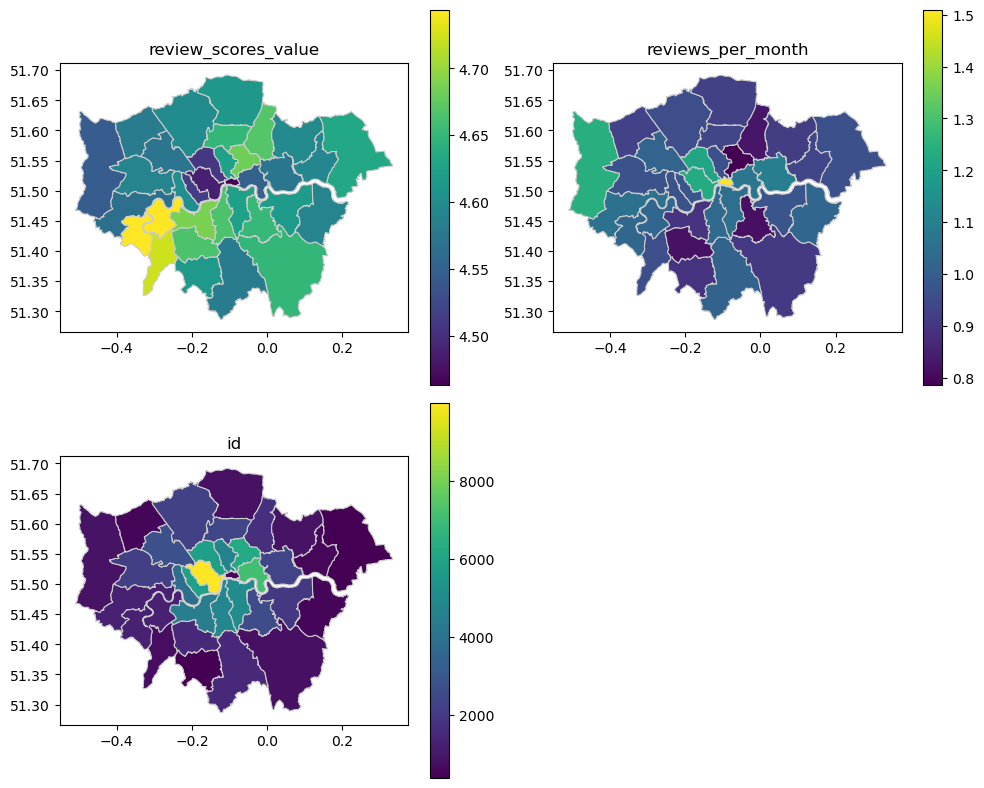

In [22]:
# List of columns for which to create heatmaps
columns = ['review_scores_value', 'reviews_per_month', 'id']

nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))

axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]
    gdf.plot(column=column, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(column)

for i in range(len(columns), nrows * ncols):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

## Q3. Is there a relationship between reviews, location and number of listings?

A. Better reviewed locations such as those in Southwest of London have low count of listings (column 'id') which could potentially indicate
opportunities for encouraging more available units for rental in that area that would have good reviews and
consequently increase user experience

In [23]:
ngb_insight.columns.to_list()

['neighbourhood_cleansed',
 'id',
 'price',
 'reviews_per_month',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

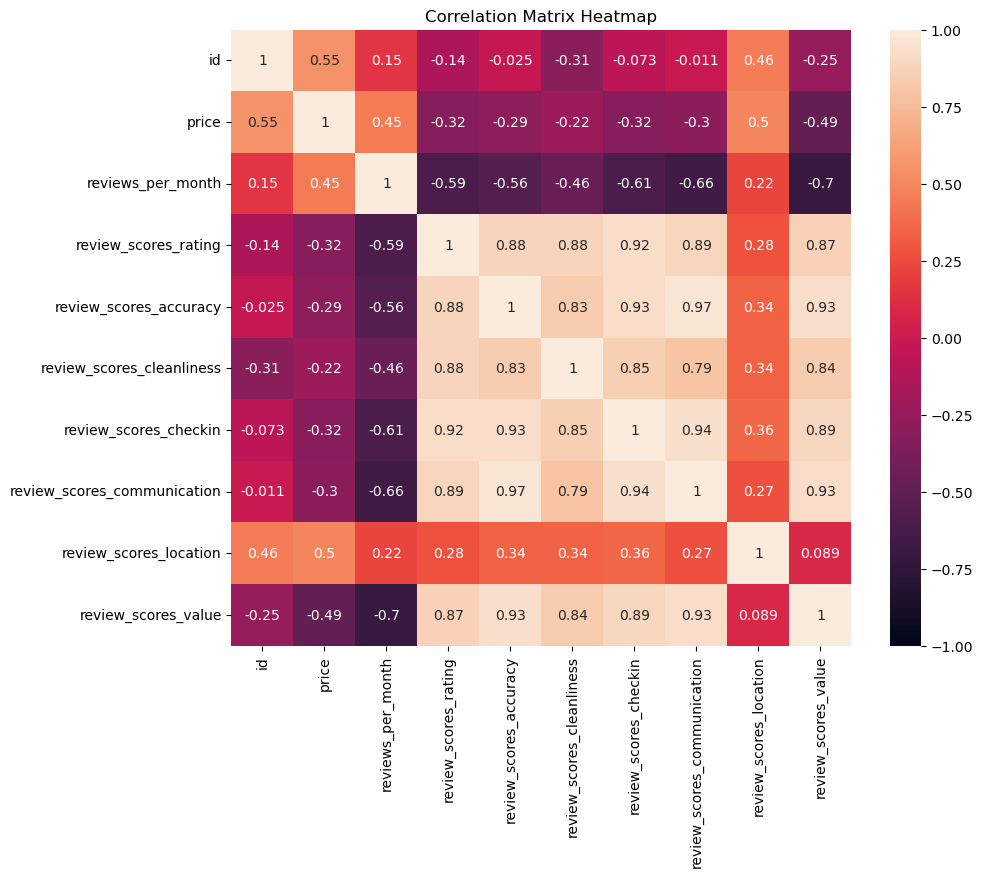

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(ngb_insight[['id',
 'price',
 'reviews_per_month',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']].corr(), annot=True, vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

## Q4. What most influences prices in the context of location?

A. According to the relationship between variables, prices have a positive correlation with the number of listings and location scores, indicating that better located units have the highest prices even with high supply.

1.4 Insights about host characteristics

In [25]:
listing.head(3)

,id,name,host_id,host_name,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,first_review,last_review,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,host_response_time,host_is_superhost
0,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,498201,Dee Dee,NaN,Wandsworth,51.44201,-0.18739,Private room,42.0,2,216,2011-06-21,2022-10-29,1.45,4.57,4.74,4.86,4.71,4.67,4.53,4.68,1,217,9,NaN,NaN,f
1,93015,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,499704,Sarah,"Hammersmith, England, United Kingdom",Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175.0,5,38,2012-02-01,2022-09-30,0.27,4.82,4.76,4.62,4.85,4.88,4.85,4.74,1,40,2,NaN,within a few hours,f
2,13913,Rental unit in Islington · ★4.80 · 1 bedroom ·...,54730,Alina,"Islington, Greater London, United Kingdom",Islington,51.56861,-0.11270,Private room,79.0,1,41,2010-08-18,2022-12-11,0.26,4.80,4.72,4.72,4.74,4.82,4.69,4.69,2,360,11,NaN,within a few hours,f


<Axes: xlabel='host_response_time', ylabel='count'>

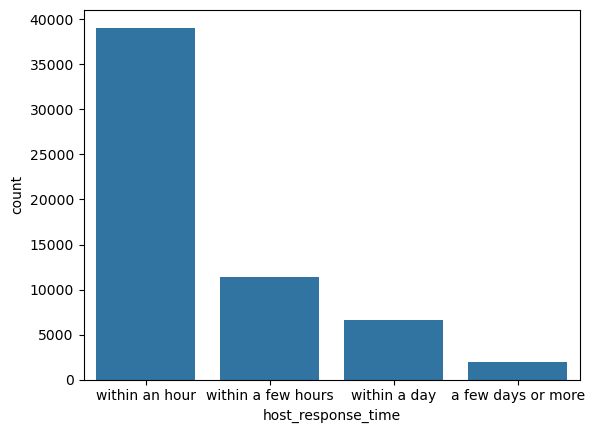

In [26]:
sns.countplot(x='host_response_time', data=listing, order=listing.host_response_time.value_counts().index)

<Axes: xlabel='host_is_superhost', ylabel='count'>

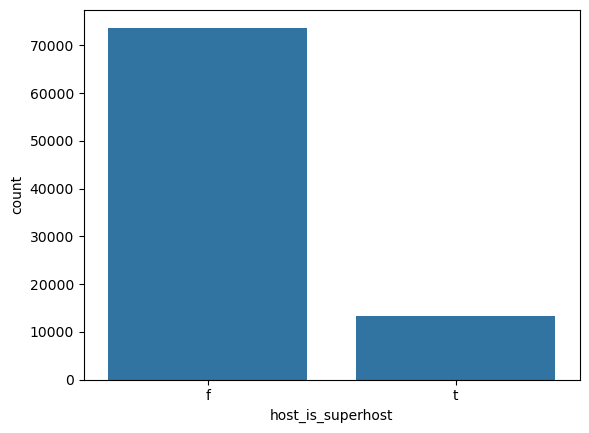

In [27]:
sns.countplot(x='host_is_superhost', data=listing, order=listing.host_is_superhost.value_counts().index)

We can see most of the listings have a response of within an hour indicating agility and interest in closing deals, however the great majority of hosts are NOT superhosts

In [28]:
listing = pd.get_dummies(listing, prefix=['response'], columns=['host_response_time'], dummy_na=True)
listing.head(2)

,id,name,host_id,host_name,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,first_review,last_review,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,host_is_superhost,response_a few days or more,response_within a day,response_within a few hours,response_within an hour,response_nan
0,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,498201,Dee Dee,NaN,Wandsworth,51.44201,-0.18739,Private room,42.0,2,216,2011-06-21,2022-10-29,1.45,4.57,4.74,4.86,4.71,4.67,4.53,4.68,1,217,9,NaN,f,False,False,False,False,True
1,93015,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,499704,Sarah,"Hammersmith, England, United Kingdom",Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175.0,5,38,2012-02-01,2022-09-30,0.27,4.82,4.76,4.62,4.85,4.88,4.85,4.74,1,40,2,NaN,f,False,False,True,False,False


In [29]:
listing.columns.to_list()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'first_review',
 'last_review',
 'reviews_per_month',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license',
 'host_is_superhost',
 'response_a few days or more',
 'response_within a day',
 'response_within a few hours',
 'response_within an hour',
 'response_nan']

In [30]:
host = listing.groupby('host_is_superhost').agg({'price':'mean', 'reviews_per_month': 'mean', 'minimum_nights':'mean',
                                             'review_scores_rating': 'mean', 'review_scores_accuracy': 'mean',
                                              'review_scores_cleanliness': 'mean','review_scores_checkin': 'mean',
                                              'review_scores_communication': 'mean', 'review_scores_location': 'mean',
                                              'review_scores_value': 'mean', 'calculated_host_listings_count': 'mean',
                                              'availability_365': 'mean', 'number_of_reviews_ltm': 'mean',
                                            'response_a few days or more': 'sum', 'response_within a day': 'sum', 
                                                'response_within a few hours': 'sum', 'response_within an hour': 'sum',
                                                'response_nan': 'sum'}).reset_index()
host

,host_is_superhost,price,reviews_per_month,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365,number_of_reviews_ltm,response_a few days or more,response_within a day,response_within a few hours,response_within an hour,response_nan
0,f,182.254721,0.879008,5.651595,4.534971,4.675786,4.574782,4.747177,4.767469,4.698216,4.553278,20.292338,115.753391,4.115660,1953,5732,8793,28992,28246
1,t,173.129644,1.577086,5.446157,4.858306,4.869775,4.827616,4.903448,4.928920,4.812219,4.764497,6.803880,149.330275,14.918935,21,813,2420,9486,558


## Q5. How much better do superhosts tend to do in comparison to regular hosts?

A. Superhosts receive in general 1.8 times more reviews per month than regular hosts which could potentially suggest superhosts have almost twice as much activity as regular hosts in their units and provide more engaging guest experiences. That is supported by the fact that superhosts also tend to receive better overall reviews and better scores in all categories (accuracy, cleanliness, checkin, communication, location and value) and that superhosts units received on average 3.62 times more reviews in the last 12 months than regular hosts units.

In [31]:
listing.host_is_superhost.value_counts()

host_is_superhost
f    73716
t    13298
Name: count, dtype: int64

In [32]:
n_f_superhost = 73716
n_t_superhost = 13298

In [33]:
host.columns.to_list()

['host_is_superhost',
 'price',
 'reviews_per_month',
 'minimum_nights',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'response_a few days or more',
 'response_within a day',
 'response_within a few hours',
 'response_within an hour',
 'response_nan']

In [34]:
print(f" Composition of response time of regular hosts: {host[host['host_is_superhost']=='f']['response_a few days or more']/n_f_superhost} {host[host['host_is_superhost']=='f']['response_within a day']/n_f_superhost} {host[host['host_is_superhost']=='f']['response_within a few hours']/n_f_superhost} {host[host['host_is_superhost']=='f']['response_within an hour']/n_f_superhost} {host[host['host_is_superhost']=='f']['response_nan']/n_f_superhost}")

print(f" Composition of response time of superhosts: {host[host['host_is_superhost']=='t']['response_a few days or more']/n_t_superhost} {host[host['host_is_superhost']=='t']['response_within a day']/n_t_superhost} {host[host['host_is_superhost']=='t']['response_within a few hours']/n_t_superhost} {host[host['host_is_superhost']=='t']['response_within an hour']/n_t_superhost} {host[host['host_is_superhost']=='t']['response_nan']/n_t_superhost}")

 Composition of response time of regular hosts: 0    0.026494
Name: response_a few days or more, dtype: float64 0    0.077758
Name: response_within a day, dtype: float64 0    0.119282
Name: response_within a few hours, dtype: float64 0    0.393293
Name: response_within an hour, dtype: float64 0    0.383173
Name: response_nan, dtype: float64
 Composition of response time of superhosts: 1    0.001579
Name: response_a few days or more, dtype: float64 1    0.061137
Name: response_within a day, dtype: float64 1    0.181982
Name: response_within a few hours, dtype: float64 1    0.71334
Name: response_within an hour, dtype: float64 1    0.041961
Name: response_nan, dtype: float64


## Q6. How much more engaged are superhosts compared to regular hosts?

A. 71.3% of superhosts reply within an hour while the available data indicates only 39,3% of regular hosts have responses of within an hour time suggesting that in order for superhosts to get more engaged guests and receive more activity as shown in Q5, they need to be engaged themselves. 

In [35]:
listing.host_is_superhost.value_counts(normalize=True)

host_is_superhost
f    0.847174
t    0.152826
Name: proportion, dtype: float64

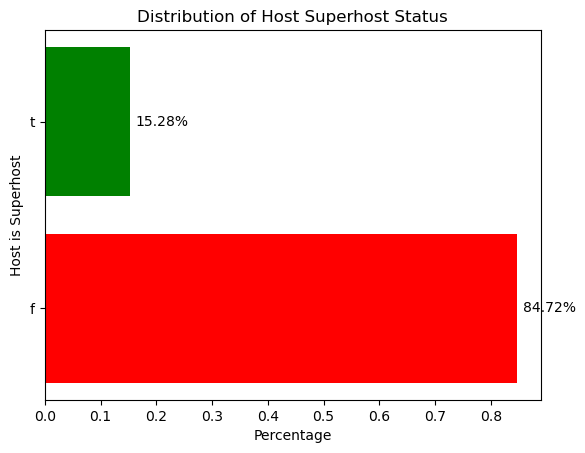

In [36]:
value_counts = listing.host_is_superhost.value_counts(normalize=True)

# Plotting a horizontal bar chart with custom colors and displaying values
colors = ['green' if index == 't' else 'red' for index in value_counts.index]
bars = plt.barh(value_counts.index, value_counts, color=colors)

plt.xlabel('Percentage')
plt.ylabel('Host is Superhost')
plt.title('Distribution of Host Superhost Status')

for bar, value in zip(bars, value_counts):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{value:.2%}', ha='left', va='center')

plt.show()

## Q7. Do you see any business opportunity in relation to the superhosts composition in the dataset?

A. Superhosts represent only 15.28% percent of listings in the dataset, meaning the great majority of listings are non-superhosts. That could indicate opportunities for growth in the superhosts community with engagement campaigns highlighting that such users are more likely to close rental deals as well as receive better review scores.

1.5 Insights about units

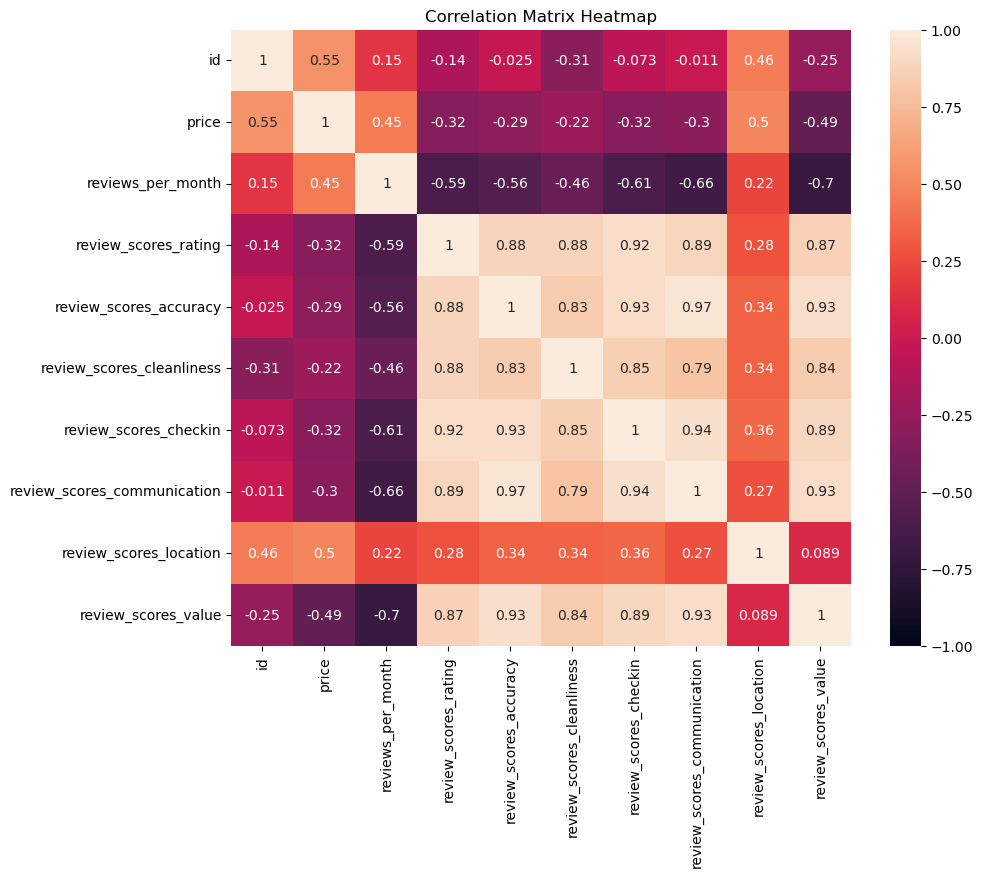

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(ngb_insight[['id',
 'price',
 'reviews_per_month',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']].corr(), annot=True, vmin=-1, vmax=1)

# Set plot title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

## Q8. Is there any relationship between the price of unit and types of review scores?

A. According to the relationship between variables, price has a negative correlation with accuracy, cleanliness, checkin and communication but a positive relationship with location score.

In [38]:
listing = pd.get_dummies(listing, prefix=['host'], columns=['host_is_superhost'], dummy_na=True)
listing.head(3)

,id,name,host_id,host_name,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,first_review,last_review,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,response_a few days or more,response_within a day,response_within a few hours,response_within an hour,response_nan,host_f,host_t,host_nan
0,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,498201,Dee Dee,NaN,Wandsworth,51.44201,-0.18739,Private room,42.0,2,216,2011-06-21,2022-10-29,1.45,4.57,4.74,4.86,4.71,4.67,4.53,4.68,1,217,9,NaN,False,False,False,False,True,True,False,False
1,93015,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,499704,Sarah,"Hammersmith, England, United Kingdom",Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175.0,5,38,2012-02-01,2022-09-30,0.27,4.82,4.76,4.62,4.85,4.88,4.85,4.74,1,40,2,NaN,False,False,True,False,False,True,False,False
2,13913,Rental unit in Islington · ★4.80 · 1 bedroom ·...,54730,Alina,"Islington, Greater London, United Kingdom",Islington,51.56861,-0.11270,Private room,79.0,1,41,2010-08-18,2022-12-11,0.26,4.80,4.72,4.72,4.74,4.82,4.69,4.69,2,360,11,NaN,False,False,True,False,False,True,False,False


In [39]:
room = listing.groupby('room_type').agg({'price':'mean', 'reviews_per_month': 'mean', 'minimum_nights':'mean',
                                             'review_scores_rating': 'mean', 'review_scores_accuracy': 'mean',
                                              'review_scores_cleanliness': 'mean','review_scores_checkin': 'mean',
                                              'review_scores_communication': 'mean', 'review_scores_location': 'mean',
                                              'review_scores_value': 'mean', 'calculated_host_listings_count': 'mean',
                                              'availability_365': 'mean', 'number_of_reviews_ltm': 'mean',
                                            'response_a few days or more': 'sum', 'response_within a day': 'sum', 
                                                'response_within a few hours': 'sum', 'response_within an hour': 'sum',
                                                'response_nan': 'sum', 'host_f': 'sum', 'host_t': 'sum', 'host_nan': 'sum',
                                            'id':'count'}).reset_index()
room

,room_type,price,reviews_per_month,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365,number_of_reviews_ltm,response_a few days or more,response_within a day,response_within a few hours,response_within an hour,response_nan,host_f,host_t,host_nan,id
0,Entire home/apt,230.168539,0.955141,6.207018,4.610787,4.708485,4.626099,4.769468,4.794556,4.729833,4.563954,22.322547,122.941237,4.965680,1041,4394,7579,25867,15694,46132,7707,736,54575
1,Hotel room,256.095890,0.573587,1.844749,4.340217,4.397065,4.452174,4.610761,4.464891,4.730924,4.263696,50.584475,199.022831,5.799087,25,14,24,128,28,212,6,1,219
2,Private room,100.231207,1.121892,4.672893,4.578425,4.725316,4.622626,4.793847,4.810632,4.705122,4.649826,11.113356,117.521262,7.167130,896,2164,3723,12921,13007,26976,5545,190,32711
3,Shared room,119.716553,1.090360,4.712018,4.141200,4.467082,4.341752,4.640773,4.654163,4.597725,4.414893,5.814059,122.551020,7.083900,17,19,43,173,189,396,40,5,441


In [40]:
listing.room_type.value_counts()

room_type
Entire home/apt    54575
Private room       32711
Shared room          441
Hotel room           219
Name: count, dtype: int64

In [41]:
n_entire_room = 54575
n_private = 32711
n_shared = 441
n_hotel = 219

In [42]:
print(f"Composition of superhosts based on type of room: Entire home/apt = {room[room['room_type']=='Entire home/apt']['host_t']/n_entire_room}, Private room =  {room[room['room_type']=='Private room']['host_t']/n_private}, Shared room = {room[room['room_type']=='Shared room']['host_t']/n_shared}, Hotel room = {room[room['room_type']=='Hotel room']['host_t']/n_hotel}")

Composition of superhosts based on type of room: Entire home/apt = 0    0.141219
Name: host_t, dtype: float64, Private room =  2    0.169515
Name: host_t, dtype: float64, Shared room = 3    0.090703
Name: host_t, dtype: float64, Hotel room = 1    0.027397
Name: host_t, dtype: float64


## Q9. Is there any insight about the types of room and superhosts?

A. Private rooms listings, relatively, have the most amount of superhosts with 16.9% of the listings being of superhosts. That could explain the fact that private rooms have the highest amount of reviews per month compared to other types as well as the highest number of reviews in the last 12 months since in Q5, we could infer that superhosts tend to have more activity and higher scores in general.

Additionaly, private rooms and entire home/apt which have the highest percentage of superhosts (16.9% and 14.1%, respectively) have the highest scores compared to the other 2 types of rooms in the dataset.

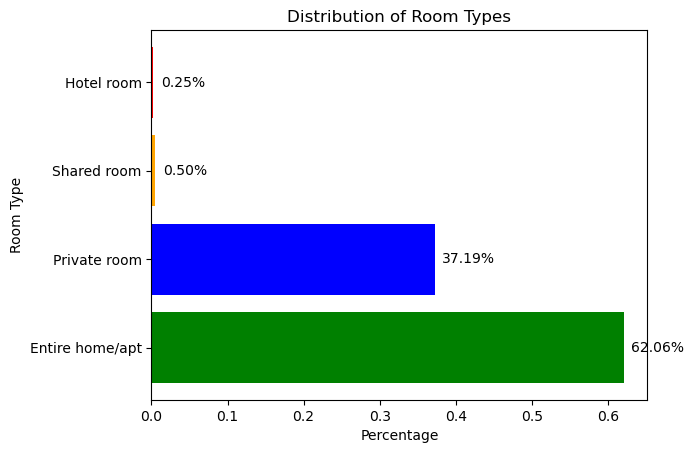

In [43]:
import matplotlib.pyplot as plt

value_counts = listing.room_type.value_counts(normalize=True)

colors = ['green', 'blue', 'orange', 'red']  
bars = plt.barh(value_counts.index, value_counts, color=colors)

plt.xlabel('Percentage')
plt.ylabel('Room Type')
plt.title('Distribution of Room Types')

for bar, value in zip(bars, value_counts):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{value:.2%}', ha='left', va='center')

plt.show()

## Q10. What is the distribution of each type of room in the listing dataset?

A. Entire room/apt compose the majority of the listings representing 62.06% of the database, followed by private rooms with 37.17%. Meanwhile, shared rooms and hotel rooms only represent 0.5% and 0.25% of the database, respectively.